# Problem 2: Forecasting corporate earnings

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

In [80]:
# Additional warning suppression for cleaner output
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')
warnings.filterwarnings('ignore', category=FutureWarning)


In [81]:
df = pd.read_csv('WMT.csv')
df = df.set_index('datacqtr')

# Convert index to PeriodIndex with quarterly frequency to avoid warnings
df.index = pd.PeriodIndex(df.index, freq='Q')

df


,FiscalYear,FiscalQuarter,revtq
datacqtr,,,
1971Q1,1971,1,12.758
1971Q2,1971,2,18.207
1971Q3,1971,3,19.205
1971Q4,1971,4,27.844
1972Q1,1972,1,21.011
...,...,...,...
2023Q4,2023,4,173388.000
2024Q1,2024,1,161508.000
2024Q2,2024,2,169335.000


In [82]:
df['log_earnings'] = np.log(df['revtq'])
df['first_difference'] = df['log_earnings'].diff(periods=1)
df['seasonal_difference'] = df['log_earnings'].diff(periods=4)

In [83]:
df

,FiscalYear,FiscalQuarter,revtq,log_earnings,first_difference,seasonal_difference
datacqtr,,,,,,
1971Q1,1971,1,12.758,2.546159,NaN,NaN
1971Q2,1971,2,18.207,2.901806,0.355648,NaN
1971Q3,1971,3,19.205,2.955171,0.053365,NaN
1971Q4,1971,4,27.844,3.326618,0.371447,NaN
1972Q1,1972,1,21.011,3.045046,-0.281571,0.498888
...,...,...,...,...,...,...
2023Q4,2023,4,173388.000,12.063287,0.075346,0.055373
2024Q1,2024,1,161508.000,11.992310,-0.070977,0.058696
2024Q2,2024,2,169335.000,12.039634,0.047324,0.046557


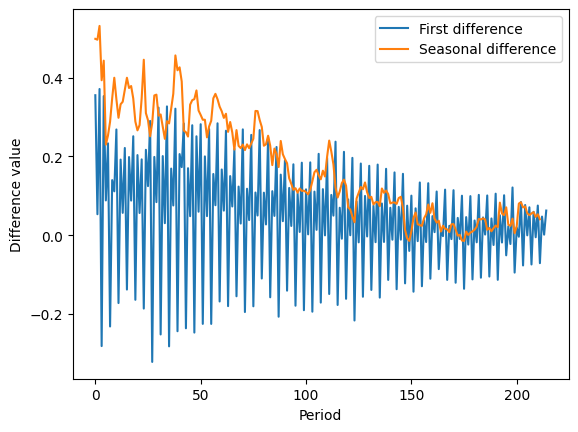

In [84]:
first_difference = df['first_difference'].dropna()
seasonal_difference = df['seasonal_difference'].dropna()


plt.plot(first_difference.values,label='First difference')
plt.plot(seasonal_difference.values, label='Seasonal difference')
plt.xlabel('Period')
plt.ylabel('Difference value')
plt.legend()
plt.show()

### Statistical description of first difference

In [85]:
first_difference.describe()

count    215.000000
mean       0.044454
std        0.148271
min       -0.321845
25%       -0.032311
50%        0.056448
75%        0.152047
max        0.371447
Name: first_difference, dtype: float64

### Statistical description of seasonal difference

In [86]:
seasonal_difference.describe()

count    212.000000
mean       0.171920
std        0.131891
min       -0.014531
25%        0.054511
50%        0.133270
75%        0.285823
max        0.531684
Name: seasonal_difference, dtype: float64

### PACF AND ACF of both of the series

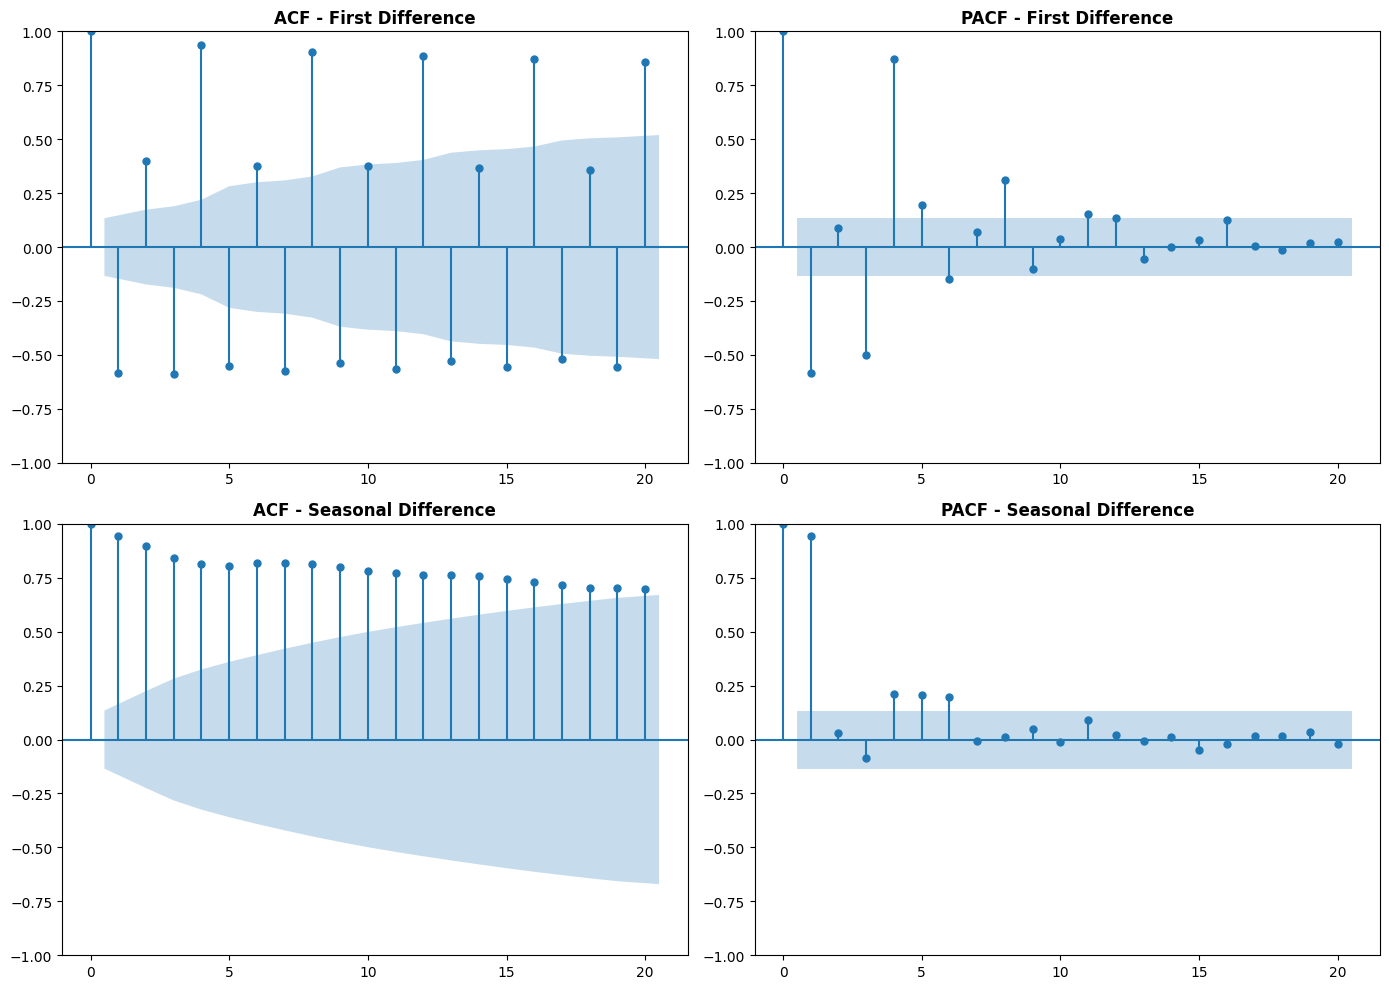

In [87]:
# Remove NaN values for ACF/PACF analysis
first_diff_clean = first_difference.dropna()
seasonal_diff_clean = seasonal_difference.dropna()

# Create subplots for first difference
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First Difference - ACF
plot_acf(first_diff_clean, lags=20, ax=axes[0, 0])
axes[0, 0].set_title('ACF - First Difference', fontsize=12, fontweight='bold')

# First Difference - PACF
plot_pacf(first_diff_clean, lags=20, ax=axes[0, 1])
axes[0, 1].set_title('PACF - First Difference', fontsize=12, fontweight='bold')

# Seasonal Difference - ACF
plot_acf(seasonal_diff_clean, lags=20, ax=axes[1, 0])
axes[1, 0].set_title('ACF - Seasonal Difference', fontsize=12, fontweight='bold')

# Seasonal Difference - PACF
plot_pacf(seasonal_diff_clean, lags=20, ax=axes[1, 1])
axes[1, 1].set_title('PACF - Seasonal Difference', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## ARIMA(0,1,1) model

In [88]:
arima_df = df.loc["1971Q1":"2018Q4"]
arima_df

,FiscalYear,FiscalQuarter,revtq,log_earnings,first_difference,seasonal_difference
datacqtr,,,,,,
1971Q1,1971,1,12.758,2.546159,NaN,NaN
1971Q2,1971,2,18.207,2.901806,0.355648,NaN
1971Q3,1971,3,19.205,2.955171,0.053365,NaN
1971Q4,1971,4,27.844,3.326618,0.371447,NaN
1972Q1,1972,1,21.011,3.045046,-0.281571,0.498888
...,...,...,...,...,...,...
2017Q4,2017,4,136267.000,11.822371,0.100978,0.039908
2018Q1,2018,1,122690.000,11.717416,-0.104955,0.042865
2018Q2,2018,2,128028.000,11.760004,0.042588,0.040325


In [89]:
order = (0,1,1)
arima_model = ARIMA(arima_df['log_earnings'].dropna(), order=order, trend='t')
arima_model_fit = arima_model.fit()
arima_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           log_earnings   No. Observations:                  192
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 116.776
Date:                Thu, 13 Nov 2025   AIC                           -227.552
Time:                        13:39:20   BIC                           -217.795
Sample:                    03-31-1971   HQIC                          -223.600
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0477      0.006      7.515      0.000       0.035       0.060
ma.L1         -0.4749      0.070     -6.826      0.000      -0.611      -0.339
sigma2         0.0172      0.002      7.940      0.000       0.013       0.021
===================================================================================
Ljung-Box (L1) (Q):                   5.49   Jarque-Bera (JB):                12.80
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Airline Model

In [90]:
# Airline Model: ARIMA(0,1,1)(0,1,1)[4]
order = (0, 1, 1)  # Non-seasonal: (p, d, q)
seasonal_order = (0, 1, 1, 4)  # Seasonal: (P, D, Q, s) where s=4 for quarterly data

# Fit the model on log earnings directly (the model will handle differencing)
airline_model = ARIMA(arima_df['log_earnings'].dropna(), 
                      order=order, 
                      seasonal_order=seasonal_order, trend='n')
airline_model_fit = airline_model.fit()
airline_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                    log_earnings   No. Observations:                  192
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 365.122
Date:                         Thu, 13 Nov 2025   AIC                           -724.244
Time:                                 13:39:21   BIC                           -714.551
Sample:                             03-31-1971   HQIC                          -720.316
                                  - 12-31-2018                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1601      0.073     -2.199      0.028      -0.303      -0.017
ma.S.L4       -0.4884      0.076     -6.418      0.000      -0.638      -0.339
sigma2         0.0012   6.53e-05     17.935      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               490.91
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## One-Quarter Ahead Forecasts for Testing Period (2019Q1 - 2024Q4)


In [91]:
# Testing period
test_start = '2019Q1'
test_end = '2024Q4'
test_idx = df.loc[test_start:test_end].index
n_test = len(test_idx)
print("Number of quarters in test sample:", n_test)

# Forecast log earnings with ARIMA(0,1,1) - using the already fitted model_fit
fc_arima = arima_model_fit.get_forecast(steps=n_test)
arima_forecasts = fc_arima.predicted_mean.values

# Forecast log earnings with airline model - using the already fitted airline_model_fit
fc_airline = airline_model_fit.get_forecast(steps=n_test)
airline_forecasts = fc_airline.predicted_mean.values

# Get actual values
actuals = df.loc[test_start:test_end, 'log_earnings'].values
test_dates = test_idx

print("\n✓ Forecasts completed for both models!")
print(f"  - Training period: 1971Q1 to 2018Q4")
print(f"  - Test period: {test_start} to {test_end} ({n_test} forecasts)")


Number of quarters in test sample: 24

✓ Forecasts completed for both models!
  - Training period: 1971Q1 to 2018Q4
  - Test period: 2019Q1 to 2024Q4 (24 forecasts)


In [92]:
# Convert Period dates to strings for plotting
test_dates_str = [str(date) for date in test_dates]


In [93]:
# Calculate forecast accuracy metrics including MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For log scale
arima_mae_log = mean_absolute_error(actuals, arima_forecasts)
arima_mse_log = mean_squared_error(actuals, arima_forecasts)
arima_rmse_log = np.sqrt(arima_mse_log)

airline_mae_log = mean_absolute_error(actuals, airline_forecasts)
airline_mse_log = mean_squared_error(actuals, airline_forecasts)
airline_rmse_log = np.sqrt(airline_mse_log)

# For original scale
arima_mae_orig = mean_absolute_error(np.exp(actuals), np.exp(arima_forecasts))
arima_mse_orig = mean_squared_error(np.exp(actuals), np.exp(arima_forecasts))
arima_rmse_orig = np.sqrt(arima_mse_orig)

airline_mae_orig = mean_absolute_error(np.exp(actuals), np.exp(airline_forecasts))
airline_mse_orig = mean_squared_error(np.exp(actuals), np.exp(airline_forecasts))
airline_rmse_orig = np.sqrt(airline_mse_orig)

# Display accuracy metrics
print("\n" + "="*80)
print("FORECAST ACCURACY METRICS")
print("="*80)
print("\nLog Scale Metrics:")
print(f"  ARIMA(0,1,1) Model:")
print(f"    MAE:  {arima_mae_log:.6f}")
print(f"    MSE:  {arima_mse_log:.6f}")
print(f"    RMSE: {arima_rmse_log:.6f}")
print(f"\n  Airline Model ARIMA(0,1,1)(0,1,1)[4]:")
print(f"    MAE:  {airline_mae_log:.6f}")
print(f"    MSE:  {airline_mse_log:.6f}")
print(f"    RMSE: {airline_rmse_log:.6f}")

print("\n\nOriginal Scale Metrics (in millions):")
print(f"  ARIMA(0,1,1) Model:")
print(f"    MAE:  ${arima_mae_orig:,.2f}M")
print(f"    MSE:  ${arima_mse_orig:,.2f}M²")
print(f"    RMSE: ${arima_rmse_orig:,.2f}M")
print(f"\n  Airline Model ARIMA(0,1,1)(0,1,1)[4]:")
print(f"    MAE:  ${airline_mae_orig:,.2f}M")
print(f"    MSE:  ${airline_mse_orig:,.2f}M²")
print(f"    RMSE: ${airline_rmse_orig:,.2f}M")
print("="*80)

# Determine which model performs better
if airline_rmse_log < arima_rmse_log:
    print(f"\n✓ The Airline Model performs BETTER with {((arima_rmse_log - airline_rmse_log) / arima_rmse_log * 100):.2f}% lower RMSE")
else:
    print(f"\n✓ The ARIMA Model performs BETTER with {((airline_rmse_log - arima_rmse_log) / airline_rmse_log * 100):.2f}% lower RMSE")



FORECAST ACCURACY METRICS

Log Scale Metrics:
  ARIMA(0,1,1) Model:
    MAE:  0.521998
    MSE:  0.329478
    RMSE: 0.574002

  Airline Model ARIMA(0,1,1)(0,1,1)[4]:
    MAE:  0.079422
    MSE:  0.009318
    RMSE: 0.096530


Original Scale Metrics (in millions):
  ARIMA(0,1,1) Model:
    MAE:  $115,370.29M
    MSE:  $18,601,393,100.05M²
    RMSE: $136,386.92M

  Airline Model ARIMA(0,1,1)(0,1,1)[4]:
    MAE:  $11,881.28M
    MSE:  $215,688,899.89M²
    RMSE: $14,686.35M

✓ The Airline Model performs BETTER with 83.18% lower RMSE


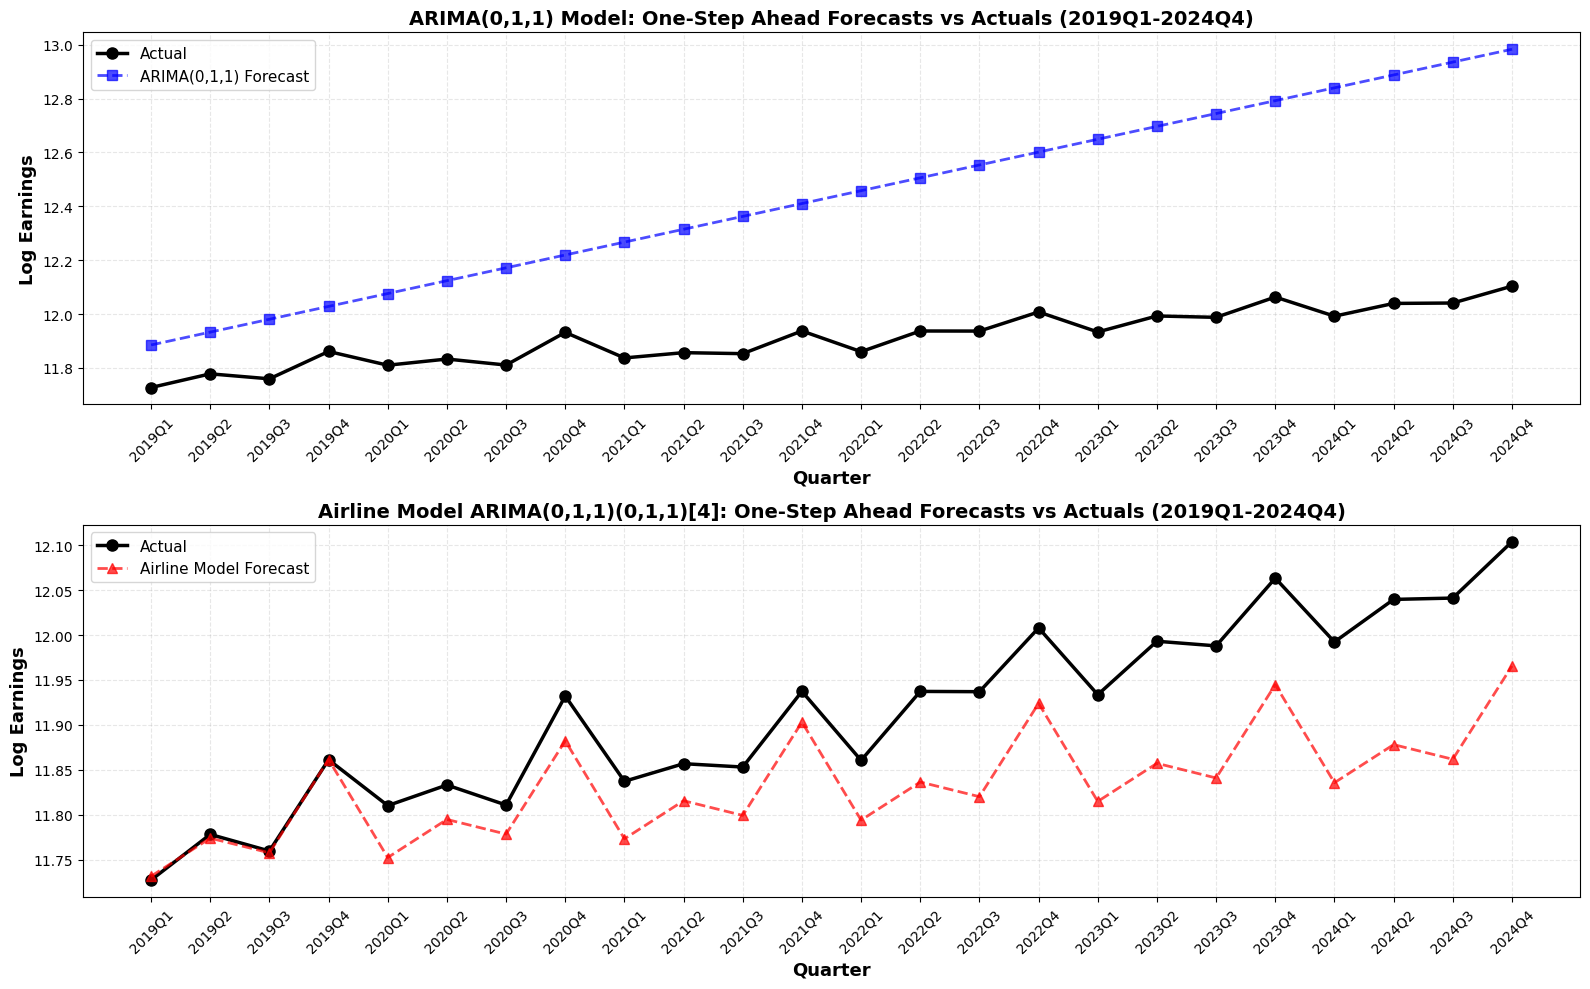

In [94]:
# Visualize forecasts vs actuals (Log Scale)
# Convert Period objects to strings for plotting
test_dates_str = [str(date) for date in test_dates]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: ARIMA Model
ax1.plot(test_dates_str, actuals, 'o-', label='Actual', linewidth=2.5, markersize=8, color='black')
ax1.plot(test_dates_str, arima_forecasts, 's--', label='ARIMA(0,1,1) Forecast', 
         linewidth=2, markersize=7, color='blue', alpha=0.7)
ax1.set_xlabel('Quarter', fontsize=13, fontweight='bold')
ax1.set_ylabel('Log Earnings', fontsize=13, fontweight='bold')
ax1.set_title('ARIMA(0,1,1) Model: One-Step Ahead Forecasts vs Actuals (2019Q1-2024Q4)', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='best')
ax1.grid(alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Airline Model
ax2.plot(test_dates_str, actuals, 'o-', label='Actual', linewidth=2.5, markersize=8, color='black')
ax2.plot(test_dates_str, airline_forecasts, '^--', label='Airline Model Forecast', 
         linewidth=2, markersize=7, color='red', alpha=0.7)
ax2.set_xlabel('Quarter', fontsize=13, fontweight='bold')
ax2.set_ylabel('Log Earnings', fontsize=13, fontweight='bold')
ax2.set_title('Airline Model ARIMA(0,1,1)(0,1,1)[4]: One-Step Ahead Forecasts vs Actuals (2019Q1-2024Q4)', 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='best')
ax2.grid(alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [95]:
# Calculate MSE
from sklearn.metrics import mean_squared_error

# MSE for log scale
arima_mse_log = mean_squared_error(actuals, arima_forecasts)
airline_mse_log = mean_squared_error(actuals, airline_forecasts)

# MSE for original scale
arima_mse_orig = mean_squared_error(np.exp(actuals), np.exp(arima_forecasts))
airline_mse_orig = mean_squared_error(np.exp(actuals), np.exp(airline_forecasts))

print(f"ARIMA MSE (log scale): {arima_mse_log:.6f}")
print(f"Airline MSE (log scale): {airline_mse_log:.6f}")
print(f"\nARIMA MSE (original scale): ${arima_mse_orig:,.2f}M²")
print(f"Airline MSE (original scale): ${airline_mse_orig:,.2f}M²")

ARIMA MSE (log scale): 0.329478
Airline MSE (log scale): 0.009318

ARIMA MSE (original scale): $18,601,393,100.05M²
Airline MSE (original scale): $215,688,899.89M²


## Summary

Here there was a significant decrease in the performance of the two models during the COVID-19 pandemic, due to an externality (namely covid) that could not be modelled with conventional time series methods. You may have had to manually correct the predictions by some negative markdown when you implemented the change in the COVID-19 pandemic